In [53]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #handling warnings.
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;">
    <br>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:20px;font-style: italic;color:  black">DATASET 1</li></center>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  darkble">MANUFACTURERS DATASET</li></center>
</ul>
    <br>
</div>

In [2]:
import pandas as pd
import numpy as np
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)
pd.options.mode.chained_assignment = None

# Define common bad values
badValues = [
    "None", "none", "null", "Null", "n/a", "N/A", "NA", "", " ", "-", "--", "'",
    "undefined", "missing", "<blank>", "???", "\\n", "\\t"
]

def cleanBadValues(df, bad_values, columns=None):
    if columns is None:
        columns = df.select_dtypes(include='object').columns

    for col in columns:
        df[col] = df[col].astype(str)
        if df[col].isin(bad_values).any():
            df[col] = df[col].replace(bad_values, np.nan)
            logging.info(f"Bad values found and cleaned in column: {col}")
    return df

def load_and_clean_manufacturers(path):
    logging.info(f"Loading manufacturers data from: {path}")
    df = pd.read_csv(path, sep=';')
    df = cleanBadValues(df, badValues)
    df.dropna(subset=['Manufacturernumber'], inplace=True)
    logging.info(f"Cleaned manufacturers data: {df.shape[0]} rows remaining.")
    return df

if __name__ == "__main__":
    manufacturers_path = "../data/manufacturers.csv"
    manufacturers_df = load_and_clean_manufacturers(manufacturers_path)
    print(manufacturers_df.head())

INFO:root:Loading manufacturers data from: ../data/manufacturers.csv
INFO:root:Cleaned manufacturers data: 309 rows remaining.


  Manufacturernumber Manufacturername
0      0 601 9K8 000            BOSCH
1        71222062000             FEIN
2      0 601 6B9 000            BOSCH
3      0 601 9K6 100            BOSCH
4      0 601 482 400            BOSCH


In [3]:
manufacturersDf= pd.read_csv(r'../data/manufacturers.csv', sep=';')
manufacturersDf.head(4)

,Manufacturernumber,Manufacturername
0,0 601 9K8 000,BOSCH
1,71222062000,FEIN
2,0 601 6B9 000,BOSCH
3,0 601 9K6 100,BOSCH


In [4]:
print('The Dataset contains {} rows & {} columns'.format(manufacturersDf.shape[0], manufacturersDf.shape[1]))

The Dataset contains 309 rows & 2 columns


In [5]:
manufacturersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Manufacturernumber  285 non-null    object
 1   Manufacturername    309 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


In [6]:
cleanManufacturersDf = manufacturersDf.copy()

In [7]:
def cleanBadValues(df, badValues, columns=None):
    if columns is None:
        columns = df.select_dtypes(include='object').columns
        
    foundBad = False
    for col in columns:
        df[col] = df[col].str.strip()
        if df[col].isin(badValues).any():
            foundBad = True
            df[col] = df[col].replace(badValues, np.nan)
    if foundBad:
        print("Bad values detected and replaced!")
    else:
        print("No Bad values found!")
    return df

badValues = ["None", "none", "null", "Null", "n/a", "N/A", "NA", "", " ", "-", "--", "'", "undefined", "missing", "<blank>", "???", "\n", "\t"]

In [8]:
cleanManufacturersDf = cleanBadValues(cleanManufacturersDf, badValues)

No Bad values found!


In [9]:
cleanManufacturersDf.isnull().sum()

Manufacturernumber    24
Manufacturername       0
dtype: int64

In [10]:
cleanManufacturersDf.dropna(subset=['Manufacturernumber'], inplace=True)

In [11]:
cleanManufacturersDf.describe()

,Manufacturernumber,Manufacturername
count,285,285
unique,285,5
top,0 601 9K8 000,BOSCH
freq,1,117


In [12]:
cleanManufacturersDf['Manufacturernumber'].duplicated().sum()

0

In [13]:
cleanManufacturersDf

,Manufacturernumber,Manufacturername
0,0 601 9K8 000,BOSCH
1,71222062000,FEIN
2,0 601 6B9 000,BOSCH
3,0 601 9K6 100,BOSCH
4,0 601 482 400,BOSCH
...,...,...
280,ES32CFB,GUSTAV KLAUKE GMBH
281,0 601 9J5 001,BOSCH
282,71221662000,FEIN
283,71700463000,FEIN


<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;">
    <br>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:20px;font-style: italic;color:  black">DATASET 2</li></center>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  darkble">PRODUCT DESCRIPTION DATASET</li></center>
</ul>
    <br>
</div>

In [14]:
productDescriptionsDf= pd.read_csv(r'../data/product_descriptions.csv', sep=';')
productDescriptionsDf.head(4)

,Articlenumber,Short description,Short description 2,Long description,Language
0,S-1124F-A,STYcutter 1124F-A – unser Einstiegsmodell mit ...,NaN,Die STYcutter 1124F-A – unser Einstiegsmodell ...,de
1,S-1310-A,STYcutter 1310-A – Der Allrounder,NaN,Die STYcutter 1310 – Der Allrounder\n\n\nUm d...,de
2,S-1310RW-A,STYcutter 1310RW-A – Der Allrounder,NaN,Die STYcutter 1310RW-A – Der Allrounder\n\n\n...,de
3,S-1310SD-A,STYcutter 1310SD-A – bewährte Qualität,NaN,Um den Anforderungen der Verarbeiter gerecht z...,de


In [15]:
productDescriptionsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Articlenumber        470 non-null    object
 1   Short description    466 non-null    object
 2   Short description 2  143 non-null    object
 3   Long description     418 non-null    object
 4   Language             470 non-null    object
dtypes: object(5)
memory usage: 18.5+ KB


In [16]:
cleanProductDescriptionsDf = productDescriptionsDf.copy()

In [17]:
cleanManufacturersDf = cleanBadValues(cleanProductDescriptionsDf, badValues)

No Bad values found!


In [18]:
cleanProductDescriptionsDf.isnull().sum()

Articlenumber            0
Short description        4
Short description 2    327
Long description        52
Language                 0
dtype: int64

#### Data Quality Check for Join Key

According to the assignment, all records used for joining must have a valid `Articlenumber` in the `product_descriptions` dataset.
As shown above, the number of missing values in the `Articlenumber` column is zero.

**Conclusion:**  
All records in `product_descriptions` have a valid `Articlenumber`. Therefore, no rows needed to be dropped for this join key requirement.

In [19]:
cleanProductDescriptionsDf.describe()

,Articlenumber,Short description,Short description 2,Long description,Language
count,470,466,143,418,470
unique,430,439,118,359,2
top,S-1124F-A,COX ELECTRAFLOW PLUS FLOORFIX 1800 ML KARTUSCH...,GKS 18V-57-2 L (solo/ C),Mit bürstenlosem Motor und QuickIN Schnittstel...,de
freq,2,3,2,6,430


In [20]:
cleanProductDescriptionsDf['Articlenumber'].duplicated().sum()

40

In [21]:
duplicateCounts = cleanProductDescriptionsDf['Articlenumber'].value_counts()
duplicates = duplicateCounts[duplicateCounts > 1]
duplicates

Articlenumber
S-1124F-A       2
0611914001      2
0611913000      2
503039          2
P00M1-12V       2
06016A8109      2
06016C1200      2
06016C0000      2
06012B4001      2
0601620100      2
06014A6000      2
06019H6L01      2
06016B8000      2
06016B9000      2
06016C1100      2
06015B3001      2
06019L5000      2
06015B2001      2
S-1310-A        2
06016B5000      2
06014A6200      2
0601B43000      2
06019H6100      2
S-1310RW-A      2
06014A3100      2
S-1310SD-A      2
S-UL55-22-K     2
S-UL55-22-KA    2
A010.00115      2
06019J4002      2
06019H6000      2
06016B4000      2
06019H6400      2
06017B0100      2
0601372201      2
06012A0400      2
06019J7001      2
06019H6300      2
06019H9001      2
06019H5202      2
Name: count, dtype: int64

In [22]:
dupes = cleanProductDescriptionsDf[cleanProductDescriptionsDf['Articlenumber'].duplicated(keep=False)]
dupes[['Articlenumber', 'Language']].sort_values('Articlenumber')

,Articlenumber,Language
445,06012A0400,en
15,06012A0400,de
459,06012B4001,en
29,06012B4001,de
444,0601372201,en
...,...,...
433,S-1310SD-A,en
434,S-UL55-22-K,en
4,S-UL55-22-K,de
5,S-UL55-22-KA,de


In [23]:
duplicatesAlongLanguage = cleanProductDescriptionsDf.duplicated(subset=['Articlenumber', 'Language'], keep=False)
print(cleanProductDescriptionsDf[duplicatesAlongLanguage])

Empty DataFrame
Columns: [Articlenumber, Short description, Short description 2, Long description, Language]
Index: []


#### Duplicate Check for `Articlenumber` in `product_descriptions`

Upon checking for duplicate `Articlenumber` values, we found that all such cases are due to the presence of multiple language versions (e.g., 'de' and 'en') for the same product. Each `Articlenumber` appears only once per language, which is expected and correct for a multilingual product catalog.

**Conclusion:**  
No rows were dropped for duplicated `Articlenumber` values, as these are not true duplicates but rather necessary multilingual entries.


In [24]:
cleanProductDescriptionsDf

,Articlenumber,Short description,Short description 2,Long description,Language
0,S-1124F-A,STYcutter 1124F-A – unser Einstiegsmodell mit ...,NaN,Die STYcutter 1124F-A – unser Einstiegsmodell ...,de
1,S-1310-A,STYcutter 1310-A – Der Allrounder,NaN,Die STYcutter 1310 – Der Allrounder\n\n\nUm d...,de
2,S-1310RW-A,STYcutter 1310RW-A – Der Allrounder,NaN,Die STYcutter 1310RW-A – Der Allrounder\n\n\n...,de
3,S-1310SD-A,STYcutter 1310SD-A – bewährte Qualität,NaN,Um den Anforderungen der Verarbeiter gerecht z...,de
4,S-UL55-22-K,"STYcutter UL55-22-K im Koffer – wenn mobil, da...",NaN,"Die STYcutter UL55-22-K – wenn mobil, dann ric...",de
...,...,...,...,...,...
465,06016B9000,Cordless circular saw BITURBO GKS 18V-70 L,GKS 18V-70 L (solo/ C),NaN,en
466,06016C1100,Cordless circular saw GKS 18V-57-2 L,GKS 18V-57-2 L (solo/ C),NaN,en
467,06015B3001,Cordless jigsaw GST 18V-125 B,GST 18V-125 B (solo/ C),NaN,en
468,06019L5000,"Cordless impact wrench GDS 18V-330 HC, in carton",GDS 18V-330 HC (solo/ C),NaN,en


<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;">
    <br>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:20px;font-style: italic;color:  black">DATASET 3</li></center>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  darkble">PRODUCT PROPERTIES DATASET</li></center>
</ul>
    <br>
</div>

In [25]:
productPropertiesDf= pd.read_csv(r'../data/product_properties.csv', sep=';')
productPropertiesDf.head(4)

,Manufacturernumber,Articlenumber,EAN,Technical details,Product category,Technical specifications,Picture normal reduced,Depth m,Width m,Length m,...,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM,ECLASS Features,ECLASS,PROFICLASS Features,PROFICLASS,Product features
0,NaN,S-1124F-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§250§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.28,0.67,1.4,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,S-1310-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§310§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.28,0.67,1.4,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,S-1310RW-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§310§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.28,0.67,1.4,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,S-1310SD-A,NaN,§Schnitthöhe§1130§mm|§Schnitttiefe§310§mm|§Geh...,NaN,NaN,'https://www.nexmart.com/media/catalog/ampshar...,0.28,0.67,1.4,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print('The Dataset contains {} rows & {} columns'.format(productPropertiesDf.shape[0],productPropertiesDf.shape[1]))

The Dataset contains 430 rows & 21 columns


In [27]:
productPropertiesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturernumber        285 non-null    object 
 1   Articlenumber             426 non-null    object 
 2   EAN                       342 non-null    float64
 3   Technical details         400 non-null    object 
 4   Product category          0 non-null      float64
 5   Technical specifications  0 non-null      float64
 6   Picture normal reduced    430 non-null    object 
 7   Depth m                   370 non-null    float64
 8   Width m                   372 non-null    float64
 9   Length m                  370 non-null    float64
 10  Weight kg                 425 non-null    float64
 11  Delivery time days        4 non-null      float64
 12  Type of product           218 non-null    object 
 13  Price quantity            430 non-null    int64  
 14  ETIM Featu

In [28]:
cleanProductPropertiesDf=productPropertiesDf.copy()

In [29]:
cleanManufacturersDf = cleanBadValues(cleanProductPropertiesDf, badValues)

Bad values detected and replaced!


In [30]:
cleanProductPropertiesDf.isnull().sum()

Manufacturernumber          145
Articlenumber                 4
EAN                          88
Technical details            30
Product category            430
Technical specifications    430
Picture normal reduced        4
Depth m                      60
Width m                      58
Length m                     60
Weight kg                     5
Delivery time days          426
Type of product             212
Price quantity                0
ETIM Features               386
ETIM                        386
ECLASS Features             430
ECLASS                      430
PROFICLASS Features         430
PROFICLASS                  430
Product features            430
dtype: int64

In [31]:
cleanProductPropertiesDf.dropna(subset=['Articlenumber','Manufacturernumber'], inplace=True)

In [32]:
cleanProductPropertiesDf = cleanProductPropertiesDf.dropna(axis=1, how='all')

Columns with only null values (no information for any product) were dropped prior to merging, as they do not contribute to the analysis and only add unnecessary clutter to the dataset.

In [33]:
cleanProductPropertiesDf.describe()

,EAN,Depth m,Width m,Length m,Weight kg,Delivery time days,Price quantity
count,2.680000e+02,237.000000,237.000000,237.000000,277.000000,4.0,281.0
mean,3.941612e+12,0.164012,0.307797,0.392705,6.153316,4.0,1.0
std,2.612655e+11,0.091753,0.105786,0.164024,5.277181,2.0,0.0
min,3.165141e+12,0.000000,0.000000,0.000000,0.350000,1.0,1.0
25%,4.012079e+12,0.102000,0.239000,0.325000,2.540000,4.0,1.0
50%,4.014587e+12,0.152000,0.357000,0.442000,5.372000,5.0,1.0
75%,4.059671e+12,0.234000,0.358000,0.445000,7.336000,5.0,1.0
max,4.068708e+12,0.572000,0.588000,0.790000,32.700000,5.0,1.0


In [34]:
cleanProductPropertiesDf.duplicated(subset=['Articlenumber', 'Manufacturernumber']).sum()

0

In [35]:
cleanProductPropertiesDf

,Manufacturernumber,Articlenumber,EAN,Technical details,Picture normal reduced,Depth m,Width m,Length m,Weight kg,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM
7,0 601 6B4 000,06016B4000,NaN,§Titel§Akku-Tauchsäge BITURBO GKT 18V-52 GC Pr...,'https://www.nexmart.com/media/catalog/ampshar...,0.254,0.36,0.444,4.032,NaN,main_product,1,NaN,NaN
8,0 601 9J4 002,06019J4002,NaN,§Titel§Akku-Winkelschleifer GWS 18V-10 Profess...,'https://www.nexmart.com/media/catalog/ampshar...,0.135,0.16,0.395,1.424,NaN,main_product,1,NaN,NaN
9,0 601 9H6 000,06019H6000,NaN,§Titel§Akku-Winkelschleifer BITURBO GWS 18V-15...,'https://www.nexmart.com/media/catalog/ampshar...,0.100,0.10,0.150,2.300,NaN,main_product,1,NaN,NaN
10,0 601 9H6 100,06019H6100,NaN,§Titel§Akku-Winkelschleifer BITURBO GWS 18V-15...,'https://www.nexmart.com/media/catalog/ampshar...,0.155,0.36,0.440,1.745,NaN,main_product,1,NaN,NaN
11,0 601 9H6 300,06019H6300,NaN,§Titel§Akku-Winkelschleifer BITURBO GWS 18V-15...,'https://www.nexmart.com/media/catalog/ampshar...,0.152,0.36,0.442,1.780,NaN,main_product,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,LS100FLEXCFB,LS100FLEXCFB,4.012079e+12,§Lochergrößen§152.4§mm|§Lochergrößen PG§48§|§L...,NaN,NaN,NaN,NaN,6.050,NaN,NaN,1,§Lochergrößen§152.4§§|§Lochergrößen PG§48§§|§L...,EC002121
328,LS50FLEXCFB,LS50FLEXCFB,4.012079e+12,§Betätigungsart§akku-hydraulisch§|§Stanzkraft§...,'https://www.nexmart.com/media/catalog/ampshar...,NaN,NaN,NaN,5.500,NaN,NaN,1,§Betätigungsart§akku-hydraulisch§§|§Stanzkraft...,EC001085
329,RALB1EU,RALB1EU,4.012079e+12,§Nennspannung§18§V|§Kapazität§2§Ah|§Ausführung...,'https://www.nexmart.com/media/catalog/ampshar...,NaN,NaN,NaN,0.350,NaN,NaN,1,§Nennspannung§18§§|§Kapazität§2§§|§Ausführung§...,EC001199
330,RALB2EU,RALB2EU,4.012079e+12,§Nennspannung§18§V|§Kapazität§5§Ah|§Ausführung...,'https://www.nexmart.com/media/catalog/ampshar...,NaN,NaN,NaN,0.640,NaN,NaN,1,§Nennspannung§18§§|§Kapazität§5§§|§Ausführung§...,EC001199


We first join `product_properties` with `product_descriptions` on `Articlenumber` to combine product details and descriptions. 
Then, we join this result with `manufacturers` on `Manufacturernumber` to add manufacturer information. 
This ensures all required join keys are present and no data is lost due to missing references.

In [36]:
mergedDf = cleanProductPropertiesDf.merge(cleanProductDescriptionsDf, on='Articlenumber', how='inner')
mergedDf.shape

(308, 18)

In [37]:
finalDf = mergedDf.merge(manufacturersDf, on='Manufacturernumber', how='inner')
finalDf.shape

(308, 19)

In [38]:
finalDf.head(2).style.background_gradient(cmap='Pastel1')

,Manufacturernumber,Articlenumber,EAN,Technical details,Picture normal reduced,Depth m,Width m,Length m,Weight kg,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM,Short description,Short description 2,Long description,Language,Manufacturername
0,0 601 6B4 000,06016B4000,nan,"§Titel§Akku-Tauchsäge BITURBO GKT 18V-52 GC Professional§|§Neuheit bis§01.08.2020§|§SOL Datum§01.05.2020§|§Verpackungsabmessungen (Breite)§360§mm|§Verpackungsabmessungen (Länge)§444§mm|§Verpackungsabmessungen (Höhe)§254§mm|§Verpackungsabmessungen (Breite x Länge x Höhe)§360 x 444 x 254§mm|§Akkuspannung§18,0 V§|§Sägeblattbohrungs-Ø§20§mm|§Leerlaufdrehzahl, von§2.800§min-1|§Leerlaufdrehzahl, bis zu§5.500§min-1|§Leerlaufdrehzahl§2.800 – 5.500§min-1|§Gewicht exkl. Akku§4,1§kg|§Sägeblattdurchmesser§140§mm|§Führungsplatte (Länge)§305§mm|§Führungsplatte (Breite)§169§mm|§Führungsplatte§305 x 169§mm|§Neigungswinkel, von§-1§°|§Neigungswinkel, bis§47§°|§Neigungswinkel§-1 - 47§°|§Werkzeugabmessungen (Breite)§209§mm|§Werkzeugabmessungen (Länge)§374§mm|§Werkzeugabmessungen (Höhe)§234§mm|§Schnitttiefe ohne Führungsschiene (90°)§52§mm|§Schnitttiefe mit Führungsschiene (90°)§46§mm|§Schnitttiefe ohne Führungsschiene (45°)§32§mm|§Schnitttiefe mit Führungsschiene (45°)§32§mm|§Unterteilung der Produktkategorien§Akku-Tauchsäge BITURBO§",'https://www.nexmart.com/media/catalog/ampshare/bosch/img-rd-298552-117_jpg/detail.jpg/normal.jpg,0.254000,0.360000,0.444000,4.032000,nan,main_product,1,nan,nan,Akku-Tauchsäge BITURBO GKT 18V-52 GC in L-BOXX,GKT 18V-52 GC (L) solo CLC,"Akku-Tauchsäge BITURBO GKT 18V-52 GC, Die Akku-Tauchsäge GKT 18V-52 GC Professional aus dem 18V-Sortiment von Bosch bietet die Leistung eines Netzgeräts und ist extrem kompakt. Ihre innovative BITURBO Brushless-Technologie mit bürstenlosem Hochleistungsmotor und ProCORE18V liefert maximale kabellose Schnittleistung auf demselben Niveau wie entsprechende kabelgebundene Tauchsägen mit 1.620 Watt. Dank ihres einzigartigen kompakten Designs, das den Betrieb mit nur einem Akku ermöglicht, bietet die Säge höchste Mobilität. Ihre sehr kompakte Bauform ermöglicht einen minimalen Abstand von nur 10 mm zwischen Sägeblatt und Wand. Diese Tauchsäge eignet sich für Tauchschnitte in Holz, Holzverbundwerkstoffen, Platten und Plattenwerkstoffen sowie in Aluminium und Acrylglas. Es kann mit Staubsack verwendet werden und ist kompatibel mit dem Bosch Click & Clean System und den Führungsschienensystemen von Bosch, Festool, Mafell und Makita sowie mit allen Bosch Professional 18V-Akkus und -Ladegeräten (Professional 18V System). Für maximale Leistung ProCORE18V ≥ 5,5 Ah verwenden. Auch kompatibel mit AMPShare, der markenübergreifenden Akku-Allianz. Die GKT 18V-52 GC Professional zeichnet sich zudem durch konstante Drehzahl, Eco-Modus für eine bis zu 20 % längere Laufzeit, HMI, individuelle Drehzahleinstellung per App, Überlastschutz, Wiederanlaufschutz, Sanftanlauf und Spindelarretierung aus. 1 x Kreissägeblatt, Expert for Wood für Akku-Sägen, 140 x 1,8/1,3 x 20 mm, 42 (2 608 644 500). L-BOXX 238 (1 600 A01 2G2). Staubbeutel (2 608 000 696). 1 x Bluetooth Low Energy Modul GCY 42 Professional (1 600 A01 3WF). Innensechskantschlüssel",de,BOSCH
1,0 601 6B4 000,06016B4000,nan,"§Titel§Akku-Tauchsäge BITURBO GKT 18V-52 GC Professional§|§Neuheit bis§01.08.2020§|§SOL Datum§01.05.2020§|§Verpackungsabmessungen (Breite)§360§mm|§Verpackungsabmessungen (Länge)§444§mm|§Verpackungsabmessungen (Höhe)§254§mm|§Verpackungsabmessungen (Breite x Länge x Höhe)§360 x 444 x 254§mm|§Akkuspannung§18,0 V§|§Sägeblattbohrungs-Ø§20§mm|§Leerlaufdrehzahl, von§2.800§min-1|§Leerlaufdrehzahl, bis zu§5.500§min-1|§Leerlaufdrehzahl§2.800 – 5.500§min-1|§Gewicht exkl. Akku§4,1§kg|§Sägeblattdurchmesser§140§mm|§Führungsplatte (Länge)§305§mm|§Führungsplatte (Breite)§169§mm|§Führungsplatte§305 x 169§mm|§Neigungswinkel, von§-1§°|§Neigungswinkel, bis§47§°|§Neigungswinkel§-1 - 47§°|§Werkzeugabmessungen (Breite)§209§mm|§Werkzeugabmessungen (Länge)§374§mm|§Werk

In [39]:
finalDf.tail(2).style.background_gradient(cmap='Pastel1')

,Manufacturernumber,Articlenumber,EAN,Technical details,Picture normal reduced,Depth m,Width m,Length m,Weight kg,Delivery time days,Type of product,Price quantity,ETIM Features,ETIM,Short description,Short description 2,Long description,Language,Manufacturername
306,RALB2EU,RALB2EU,4012078866842.000000,§Nennspannung§18§V|§Kapazität§5§Ah|§Ausführung§Lithium-Ionen§|§Gewicht§635§g,'https://www.nexmart.com/media/catalog/ampshare/klauke/ralb2eu_jpg/detail.jpg/normal.jpg,nan,nan,nan,0.640000,nan,nan,1,§Nennspannung§18§§|§Kapazität§5§§|§Ausführung§Lithium-Ionen§§|§Gewicht§635§§,EC001199,"Akku Li-Ion Bosch, 18V/5Ah",nan,"Bosch Li-Ion Akku 18V/5Ah Akku, geeignet für die Verwendung im EU-Raum in Verbindung mit dem Ladegerät LGLB1EU",de,BOSCH
307,RALB2US,RALB2US,4012078868662.000000,§Nennspannung§18§V|§Kapazität§5§Ah|§Ausführung§Lithium-Ionen§|§Gewicht§635§g,'https://www.nexmart.com/media/catalog/ampshare/klauke/ralb2eu_jpg/detail.jpg/normal.jpg,nan,nan,nan,0.640000,nan,nan,1,§Nennspannung§18§§|§Kapazität§5§§|§Ausführung§Lithium-Ionen§§|§Gewicht§635§§,EC001199,Bosch Akku Li-Ion,nan,"Bosch Akku 18V /5,0 Ah Li-Ion 1607A3502E",de,BOSCH


In [40]:
print('The Dataset contains {} rows & {} columns'.format(finalDf.shape[0],finalDf.shape[1]))

The Dataset contains 308 rows & 19 columns


In [41]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturernumber      308 non-null    object 
 1   Articlenumber           308 non-null    object 
 2   EAN                     282 non-null    float64
 3   Technical details       304 non-null    object 
 4   Picture normal reduced  304 non-null    object 
 5   Depth m                 264 non-null    float64
 6   Width m                 264 non-null    float64
 7   Length m                264 non-null    float64
 8   Weight kg               304 non-null    float64
 9   Delivery time days      4 non-null      float64
 10  Type of product         241 non-null    object 
 11  Price quantity          308 non-null    int64  
 12  ETIM Features           44 non-null     object 
 13  ETIM                    44 non-null     object 
 14  Short description       304 non-null    ob

In [42]:
finalDf.isnull().sum()

Manufacturernumber          0
Articlenumber               0
EAN                        26
Technical details           4
Picture normal reduced      4
Depth m                    44
Width m                    44
Length m                   44
Weight kg                   4
Delivery time days        304
Type of product            67
Price quantity              0
ETIM Features             264
ETIM                      264
Short description           4
Short description 2       171
Long description           28
Language                    0
Manufacturername            0
dtype: int64

In [43]:
# Filter out numeric columns only
numericData = finalDf.select_dtypes(include='number').columns.tolist()

# Get descriptive statistics for numeric data
finalDfDescriptiveStatics = finalDf[numericData].describe().T

# Add median to the descriptive statistics
finalDfDescriptiveStatics['median'] = finalDf[numericData].median().T

# Add mode to the descriptive statistics (taking the first mode, if multiple modes exist)
finalDfDescriptiveStatics['mode'] = finalDf[numericData].mode().iloc[0]

# Add range (difference between max and min values) to the descriptive statistics
finalDfDescriptiveStatics['range'] = (finalDfDescriptiveStatics['max'] - finalDfDescriptiveStatics['min']).T

# Display the final descriptive statistics
finalDfDescriptiveStatics.T.style.background_gradient(cmap='Pastel2')

,EAN,Depth m,Width m,Length m,Weight kg,Delivery time days,Price quantity
count,282.000000,264.000000,264.000000,264.000000,304.000000,4.000000,308.000000
mean,3941071603107.021484,0.167594,0.303424,0.396186,5.987311,4.000000,1.000000
std,264067561915.906189,0.094509,0.107311,0.160669,5.360854,2.000000,0.000000
min,3165140508940.000000,0.000000,0.000000,0.000000,0.350000,1.000000,1.000000
25%,4012078883620.000000,0.108000,0.229500,0.334750,2.300000,4.000000,1.000000
50%,4014586899198.000000,0.152000,0.357000,0.442000,5.039500,5.000000,1.000000
75%,4059952510229.250000,0.234000,0.358000,0.445000,7.030000,5.000000,1.000000
max,4068708005556.000000,0.572000,0.588000,0.790000,32.700000,5.000000,1.000000
median,4014586899198.000000,0.152000,0.357000,0.442000,5.039500,5.000000,1.000000
mode,3165140939843.000000,0.152000,0.358000,0.445000,1.200000,5.000000,1.000000


In [44]:
engineeredDf = finalDf.copy()

In [45]:
def addEngineeredFeatures(df):

    # Feature: Count of products per manufacturer
    manu_counts = df['Manufacturername'].value_counts()
    df['Manufacturer_product_count'] = df['Manufacturername'].map(manu_counts)

    df['Product_length_category'] = pd.cut(df['Length m'], bins=[0, 0.3, 0.5, 1.0], labels=['Small', 'Medium', 'Large'])

    # Feature: Flag for having an image
    df['Has_image'] = df['Picture normal reduced'].notnull().astype(int)

    # Feature: Product volume in cubic meters (if all dims are available)
    df['Volume_m3'] = df[['Depth m', 'Width m', 'Length m']].prod(axis=1)

    # Feature: Flag for long description presence
    df['Has_long_description'] = df['Long description'].notnull().astype(int)

    # Feature: Length of long description
    df['Description_length'] = df['Long description'].fillna('').apply(len)

    return df

In [46]:
engineeredDf = addEngineeredFeatures(engineeredDf)

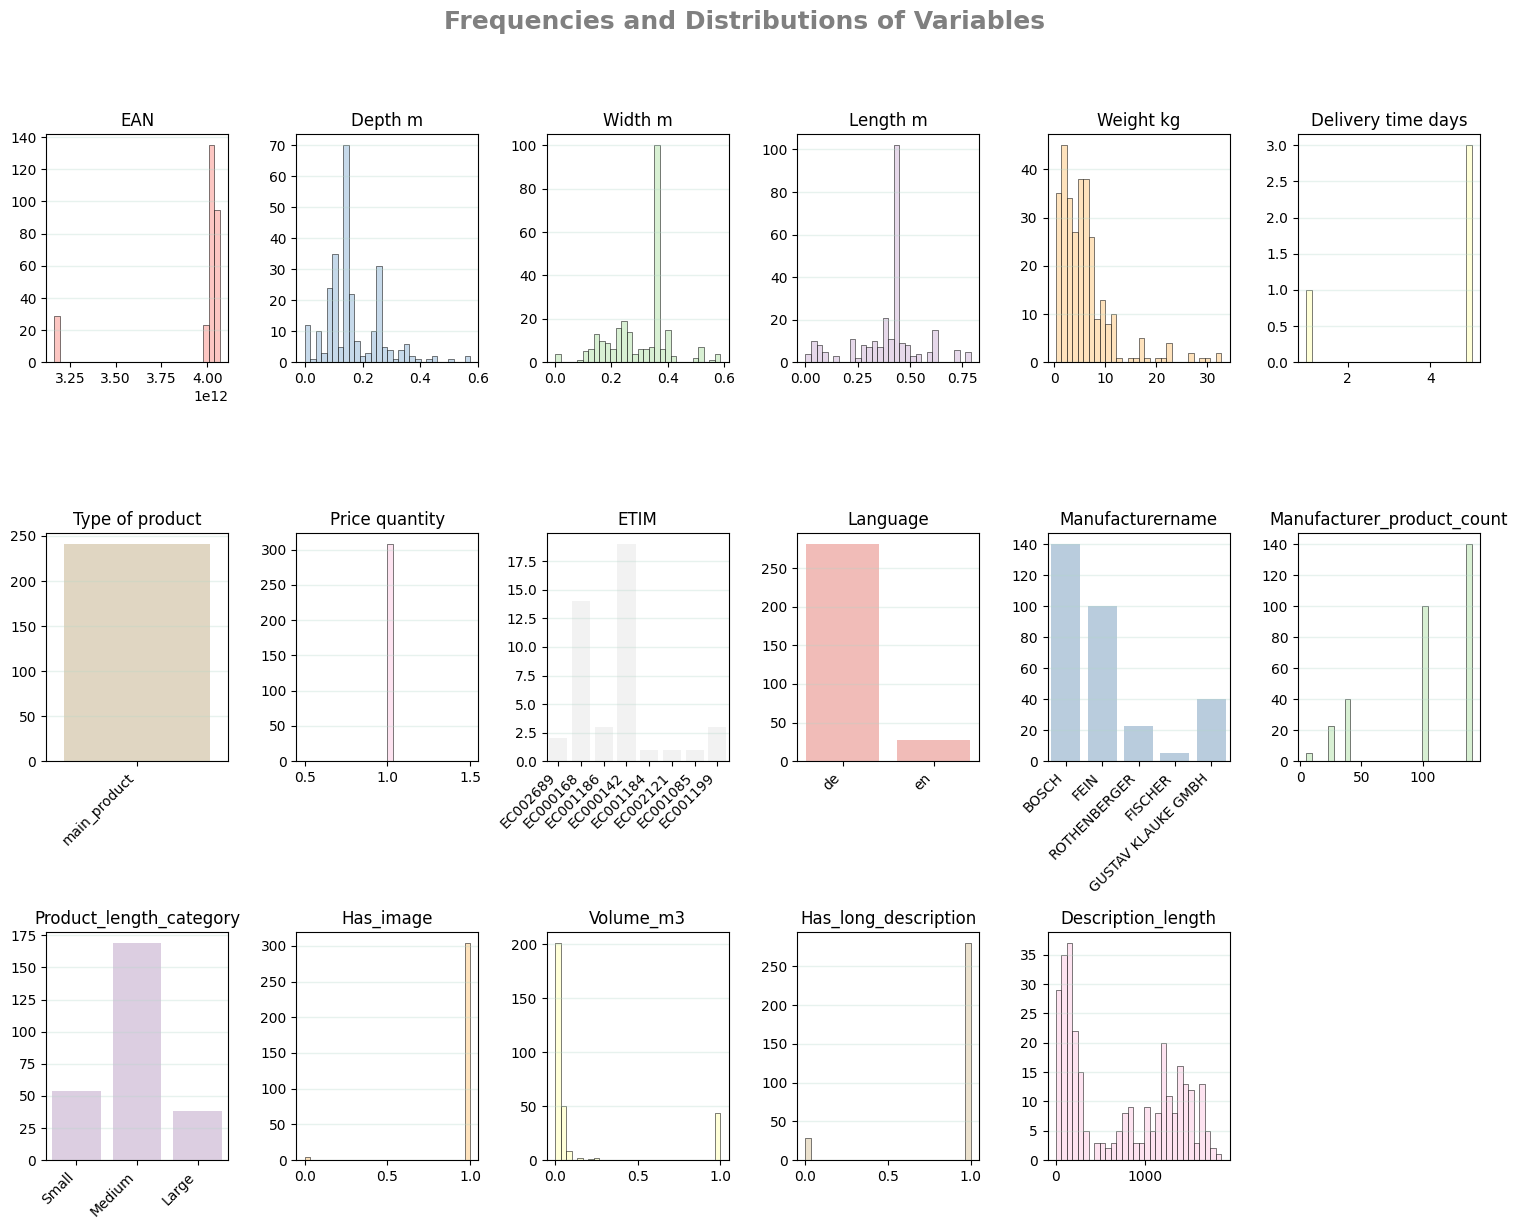

In [106]:
def plotFrequencyGridSmart(df, cols=None, nCols=6, figHeightPerRow=4, figWidthPerPlot=2.5, title=None, maxStrLen=20, maxUniqueFrac=0.5):
    if cols is None:
        cols = df.columns.tolist()

    usableCols = []
    for col in cols:
        if df[col].dtype == 'O' or pd.api.types.is_string_dtype(df[col]):
            avg_len = df[col].dropna().astype(str).str.len().mean()
            unique_frac = df[col].nunique(dropna=True) / len(df)
            if avg_len < maxStrLen and unique_frac < maxUniqueFrac:
                usableCols.append(col)
        else:
            usableCols.append(col)

    nVars = len(usableCols)
    if nVars == 0:
        print("No suitable columns to plot.")
        return

    nRows = math.ceil(nVars / nCols)
    figWidth = figWidthPerPlot * nCols
    figHeight = figHeightPerRow * nRows

    palette = sns.color_palette("Pastel1", n_colors=nVars)

    fig, axes = plt.subplots(nRows, nCols, figsize=(figWidth, figHeight), squeeze=False)
    axes = axes.flatten()

    for i, col in enumerate(usableCols):
        ax = axes[i]
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(data=df, x=col, ax=ax, color=palette[i % len(palette)], bins=30, kde=False)
        else:
            sns.countplot(data=df, x=col, ax=ax, color=palette[i % len(palette)])
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        ax.set_title(col, fontsize=12)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
        ax.set_facecolor((1, 1, 1, 0.9))
        ax.patch.set_edgecolor('black')

    for j in range(nVars, nRows * nCols):
        fig.delaxes(axes[j])

    if title:
        plt.suptitle(title, fontsize=18, color='grey', fontweight='bold', y=1.02)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plotFrequencyGridSmart(engineeredDf, title="Frequencies and Distributions of Variables")

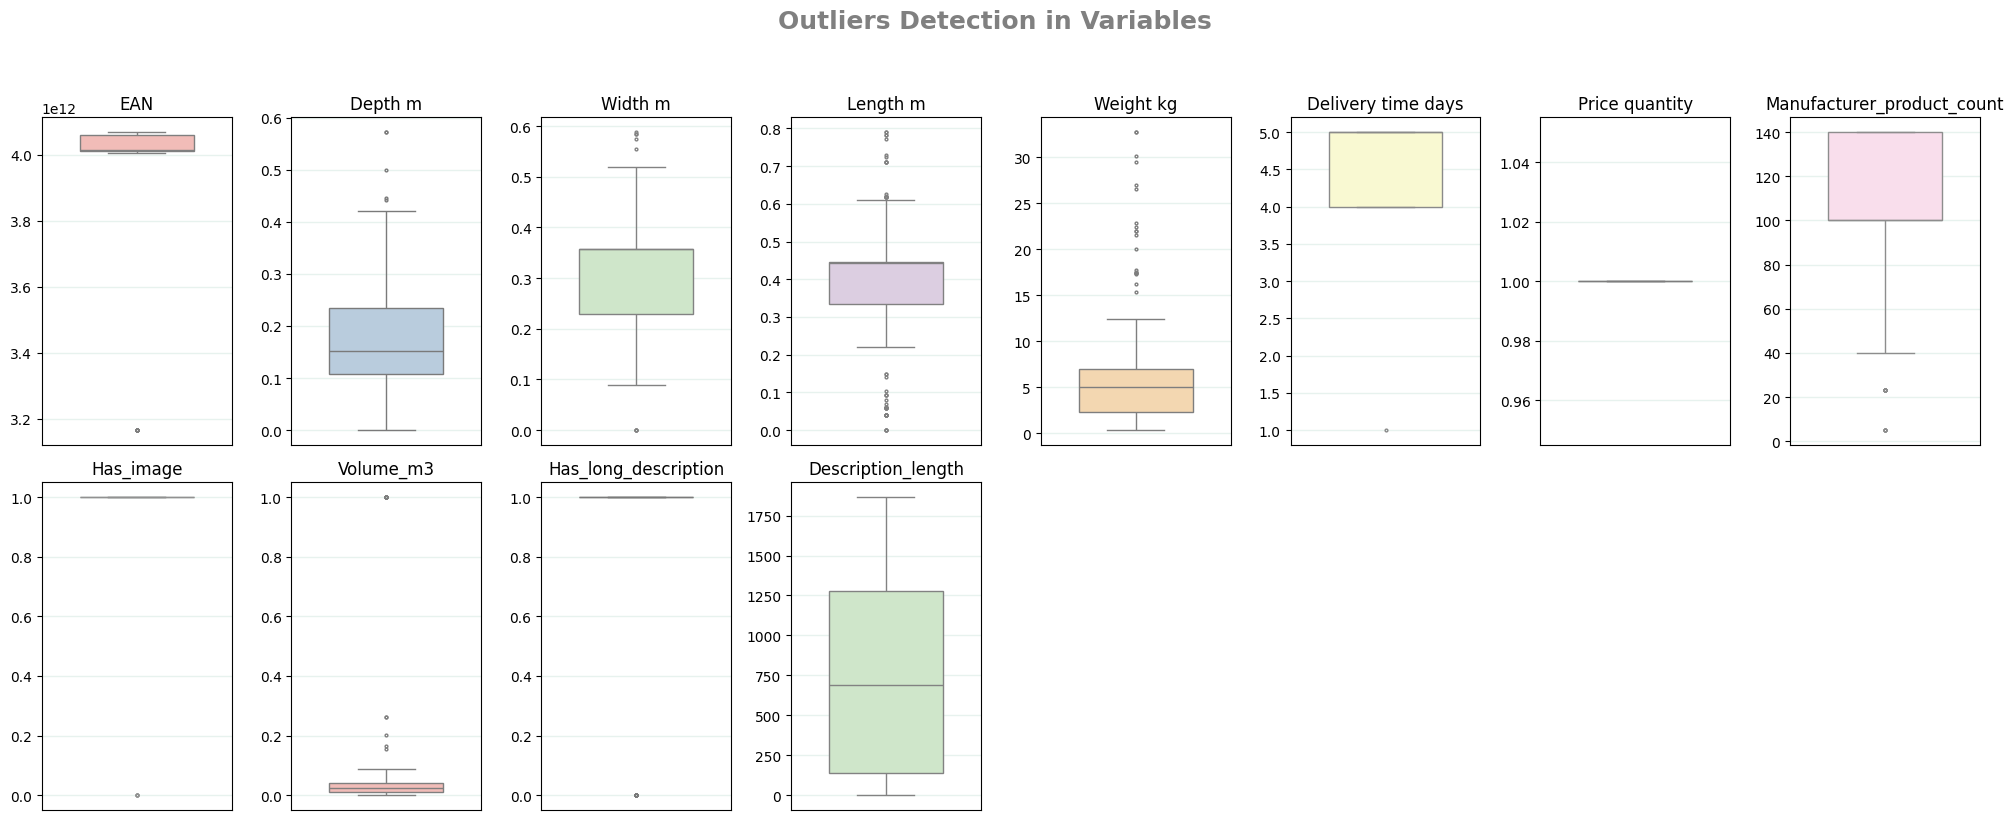

In [110]:
def plotBoxplotGrid(df, cols=None, nCols=8, figHeightPerRow=4, figWidthPerPlot=2.5, title=None):
    if cols is None:
        cols = [col for col in df.select_dtypes(include=[np.number]).columns]
    nVars = len(cols)
    nRows = math.ceil(nVars / nCols)
    figWidth = figWidthPerPlot * nCols
    figHeight = figHeightPerRow * nRows

    palette = sns.color_palette("Pastel1", n_colors=nVars)

    fig, axes = plt.subplots(nRows, nCols, figsize=(figWidth, figHeight), squeeze=False)
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.boxplot(y=df[col], ax=axes[i], color=palette[i % len(palette)], width=0.6, fliersize=2)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_ylabel("")
        #axes[i].set_yticklabels([])
        axes[i].set_xticks([])
        axes[i].grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
        axes[i].set_facecolor((1, 1, 1, 0.9))
        axes[i].patch.set_edgecolor('black')
    
    for j in range(nVars, nRows * nCols):
        fig.delaxes(axes[j])
    if title:
        plt.suptitle(title, fontsize=18, color='grey', fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

numericCols = [col for col in engineeredDf.select_dtypes(include=[np.number]).columns]
plotBoxplotGrid(engineeredDf, cols=numericCols, nCols=8, figHeightPerRow=4, figWidthPerPlot=2.5, title="Outliers Detection in Variables")